## NumPy 그림 그리기
---
### 다중 그림 그리기   

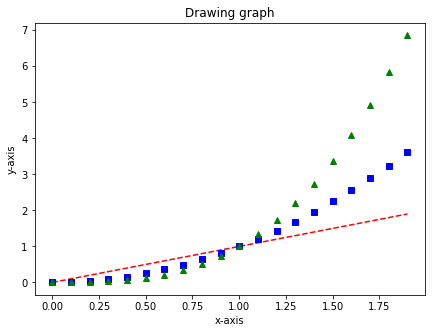

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0., 2., 0.1)  # 0, 0.1, 0.2, ... , 1.9

plt.figure(figsize=(7, 5))  # Figure size (7, 5)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Drawing graph")
plt.plot(x, x, 'r--', x, x ** 2, 'bs', x, x ** 3, 'g^')
# y = x (빨간 점선), y = x^2 (파란 네모), y = x^3 (초록 세모)
plt.show()

### Numpy 함수를 이용한 그래프   
---
Numpy 함수를 이용한 그래프 : https://numpy.org/doc/stable/reference/routines.math.html   

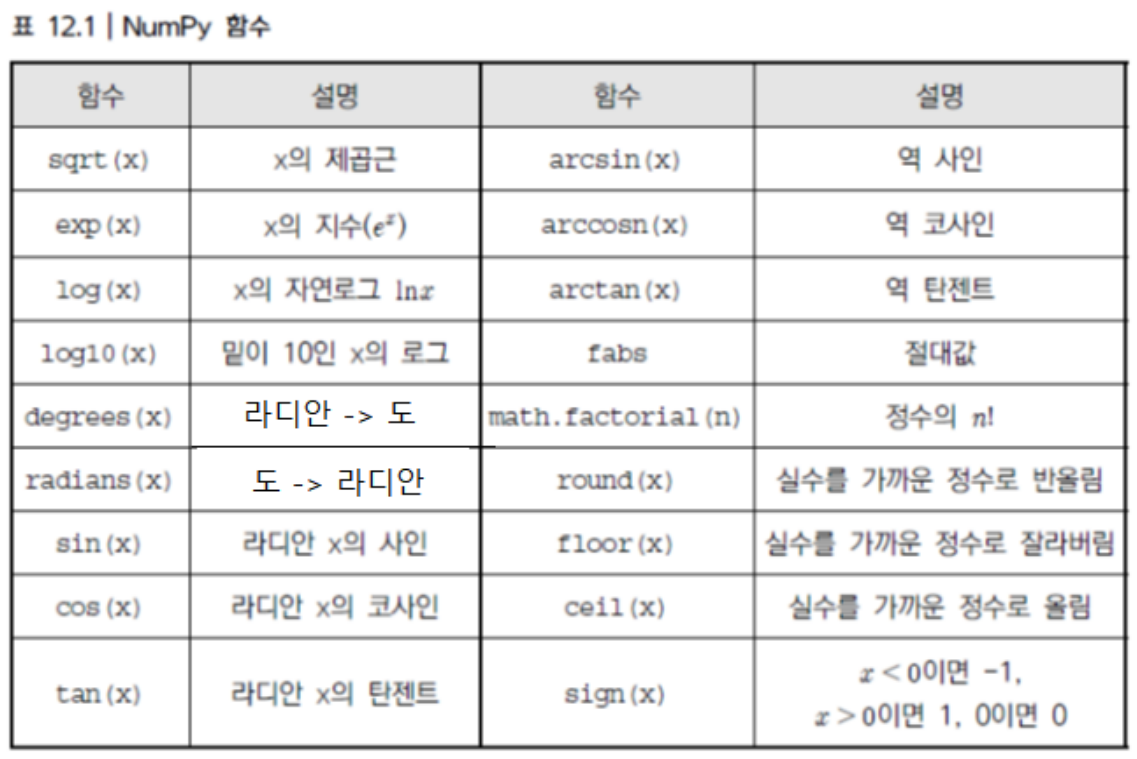

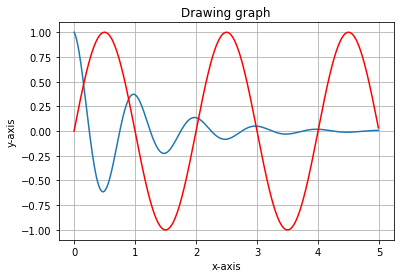

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):  # e^-t x cos(2pi * t)
    return np.exp(-t) * np.cos(2 * np.pi * t)

def g(t):  # sin(pi * t)
    return np.sin(np.pi * t)

t = np.arange(0.0, 5.0, 0.01)  # 0.00, 0.01, 0.02, ... 4.99

plt.plot(t, f(t), t, g(t), 'r-')
# y = f(t) (지정 형식 없음, 디폴트), y = g(t) (빨간 실선)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Drawing graph")
plt.grid()

plt.show()

### 출석 대체 예제 1
---
- 강의자료 4페이지에 있는 그림에다가 추가로 다음 두 함수를 중첩해서 그리고, 결과 그림과 코드를 LMS에 올리시오.
- `h(t)`: `exp(-t)`, 검정색 (`cyan`)
- `k(t)`: `-exp(-t)`, 심홍색 (`magenta`)
- 단, t의 범위는 바로 위에 있는 t의 범위와 동일
- 그래프 옵션은 9주차 수업자료 12page 참고할 것

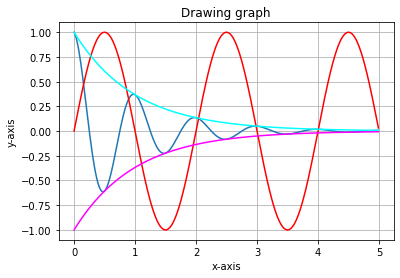

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):  # e^-t x cos(2pi * t)
    return np.exp(-t) * np.cos(2 * np.pi * t)

def g(t):  # sin(pi * t)
    return np.sin(np.pi * t)

def h(t):  # exp(-t)
    return np.exp(-t)

def k(t):  # -exp(-t)
    return -np.exp(-t)

t = np.arange(0.0, 5.0, 0.01)  # 0.00, 0.01, 0.02, ... 4.99

plt.plot(t, f(t), t, g(t), 'r-', t, h(t), 'cyan', t, k(t), 'magenta')  # 색 지정 답안 : 'c-', 'm-'
# y = f(t) (지정 형식 없음, 디폴트), y = g(t) (빨간 실선)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Drawing graph")
plt.grid()

plt.show()

## Random
---
### `numpy.random`
- 난수 발생 및 배열 생성 모듈
- `np.random.random((n, m))`
- 0.0~1.0 사이의 임의의 값들을 취하는 (n, m)크기 배열 반환

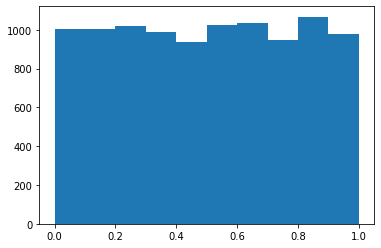

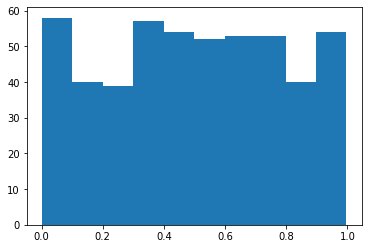

[0.35431606 0.13328331 0.86632146 ... 0.82450326 0.30408059 0.6129131 ]

[[0.42025068 0.89624425 0.82558821]
 [0.46079284 0.09671379 0.52789165]]



In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random(10000)
data2 = np.random.rand(500)  # rand는 약간 차이가 있지만 random과 거의 유사하게 사용 가능

plt.hist(data, bins = 10)  # bins의 의미는 구간을 나누는 개수
plt.show()

plt.hist(data2, bins = 10)
plt.show()

print(data, end="\n\n")
print(np.random.random((2, 3)), end="\n\n")

### `np.random.randint(최저값, 최고값, (n, m))`
- 최저값과 (최고값 - 1) 사이의 무작위 정수로 (n, m)크기 배열 반환

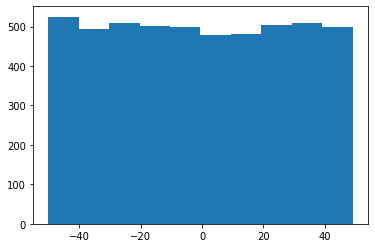

49

-50

[[  0  33 -29]
 [ 24   5  -3]]



In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randint(-50, 50, 5000)

plt.hist(data, bins = 10)
plt.show()

print(np.max(data), end="\n\n")
print(np.min(data), end="\n\n")
print(np.random.randint(-50, 50, (2, 3)), end="\n\n")

### `np.random.normal(평균, 표준 편차, 표본 개수)`
- 정규 분포 확률 밀도에서 표본을 추출

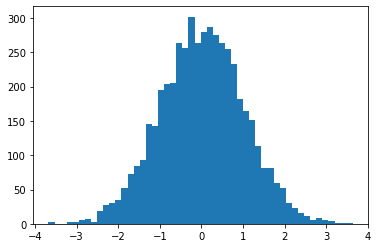

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(0, 1, 5000)

plt.hist(data, bins=50)
plt.show()

## 브로드캐스팅
---
### 브로드캐스팅 (Broadcasting)
- 두 개의 다른 크기의 배열끼리 연산을 수행하는 것
- NumPy는 각 cell별로 multiplication이 수행이 된다고 생각하며 이러한 concept를 broadcasting이라고 함
- 모든 case에 대하여 다 되는 것은 아니며 특정 상황을 만족해야 함   
   
### Broadcasintg을 위한 조건
- Dimension이 같은 경우: 각 차원별로 크기가 같거나, 다르다면 어느 한 쪽이 1이어야 함
    - 예 : `(15, 1, 5)`와 `(15, 3, 5)`, `(4, 6, 5)`와 `(1, 1, 5)`
    - `(1, 3, 1)`과 `(2, 1, 3)`도 가능 -> `(2, 3, 3)`
    - 브로드캐스팅이 가능하기 위한 조건은 `(min(a_i, b_i) == 1) or (a_i == b_i)`, 결과물은 `max(a_i, b_i)`
- Dimension이 다른 경우: 둘 중 차원이 작은 것의 크기가 `𝑎1 × 𝑎2 × ⋯ × 𝑎𝑛`일 때, 차원이 같아지도록 차이 나는 개수만큼 앞을 1로 채워 `1 × ⋯ 1 × 𝑎1 × 𝑎2 × ⋯ × 𝑎𝑛`와 같이 만든 후 Dimension이 같은 경우와 동일한 조건을 만족하여야 함   

In [7]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
print(a * b, end="\n\n")  # [2 4 6]

a = np.array([1, 2, 3])
b = 2
print(a * b, end="\n\n")  # [2 4 6]

a = np.array([[0.0, 0.0, 0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
print(a + b, end="\n\n")
# b2 = np.array([1.0, 2.0, 3.0, 4.0])
# print(a + b2)
# a는 (4, 3)이고 b2는 (4,)인데, 브로드캐스팅은 앞에서부터 1을 채우기 때문에 b2가 (1, 4)가 되어서 연산 불가

a = np.array([0.0, 10.0, 20.0, 30.0]).reshape(4, 1)
b = np.array([1.0, 2.0, 3.0])
print(a + b, end="\n\n")

[2 4 6]

[2 4 6]

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]



## NumPy 입출력
---
### 3가지 입출력 방법
- 파이썬 고유의 내장함수로 처리: `open()`, `read()`, `write()`, `close()`
- 넘파이에서 제공하는 방법
- 판다스에서 제공하는 방법   
   
### NumPy binary 파일 (NPY, NPZ)
- NPY 포맷: 표준 2진파일로 파일에 대한 정보와 함께 저장장치에 넘파이 배열들을 저장
- NPZ 포맷: 복수의 넘파이 파일들을 유지하기 위한 표준 포맷   

### 데이터의 생성과 `numpy.save`, `numpy.load` 의 사용

In [8]:
import numpy as np

arr = np.arange(12).reshape(3, 4)

np.save('svd_arr', arr)
data = np.load('svd_arr.npy')

print(data, end="\n\n")

arr1 = np.arange(12).reshape(3, 4)
arr2 = np.arange(20).reshape(4, 5)

np.savez('svdz_arr', a=arr1, b=arr2)
arr_zp = np.load('svdz_arr.npz')

print(arr_zp['a'], end="\n\n")
print(arr_zp['b'], end="\n\n")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]



### `loadtxt()`, `savetxt()`
- 배열 데이터를 읽어오거나 저장하는 기능

In [9]:
import numpy as np

csv_data = np.loadtxt("/kaggle/input/inflammation/inflammation-01.csv", delimiter = ",")
print(csv_data, end="\n\n")

data_my = np.random.randint(0, 5, (10, 10))
print(data_my, end="\n\n")

np.savetxt("example1.csv", data_my, delimiter = ",")

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]

[[4 4 4 2 1 2 1 1 1 1]
 [3 4 0 4 2 0 3 0 3 1]
 [4 4 0 2 0 2 0 3 2 2]
 [2 0 2 2 4 3 0 1 2 2]
 [1 1 0 0 4 1 3 1 4 0]
 [0 2 4 0 4 0 2 0 1 4]
 [4 0 3 1 3 1 1 3 0 2]
 [2 2 0 2 0 0 1 0 4 2]
 [4 2 2 4 0 1 0 1 2 3]
 [1 0 4 0 1 1 2 3 2 2]]



## Image processing using NumPy
---
### 이미지 처리
- 이미지의 입력과 출력
- 불필요한 부분을 다듬는 cropping, 뒤집는 flipping, 회전하는 rotating
- 잡음 제거 (de-noising), 선명히 하기 (sharpening)과 같은 이미지 필터링 (filtering)
- 이미지 분류 (classification)
- 특징 추출 (feature extraction)   
   
### NumPy와 matplotlib를 활용한 데이터 처리 예제 제시
- 이미지 표시 : 보여주기(`np.imread()`, `np.imshow()`)
- 이미지 클리핑 : 특정 영역만 잘라서 보여주기(인덱스 슬라이싱 이용)
- 이미지 반전 : 축에 대해 뒤집기(`np.flip()`, `axis=0`은 상하반전 `axis=1`은 좌우반전)
- grayscale : 흑백화하기(아래 함수 정의 참고)
- 색 반전 : 1에서 빼기(출석 예제 참고)

(138, 220, 4)



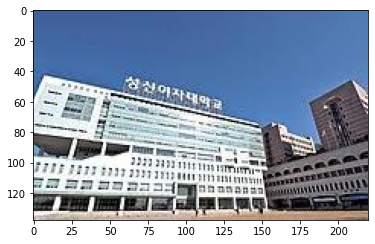

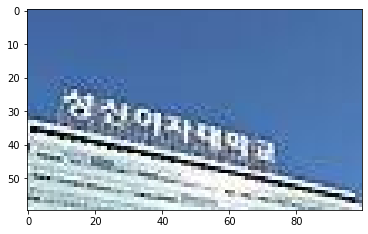

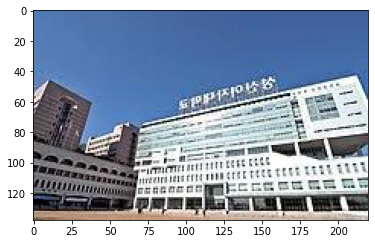

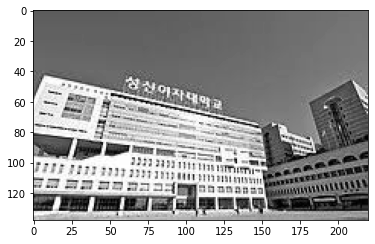

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지 표시 : 보여주기
arr1 = plt.imread('/kaggle/input/220513-img-sample/sungshin.png')
# print(arr1, end="\n\n")
# [픽셀 값 배열 생략] (138, 220, 4) 가로 137, 세로 220, RGB 칼라 이미지

plt.imshow(arr1)
print(arr1.shape, end="\n\n")
plt.show()

# 이미지 클리핑 : 특정 영역만 잘라서 보여주기
arr2 = arr1[20:80, 50:150, :]  # 가로줄 범위, 세로줄 범위, 지정 값 없음
plt.imshow(arr2)
plt.show()

# 이미지 반전 : 축에 대해 뒤집기
arr3 = np.flip(arr1, axis=1)  # 0 : 상하반전, 1 : 좌우반전
plt.imshow(arr3)
plt.show()

# 이미지 grayscale : 이미지 흑백화하기
def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

arr4 = rgb2gray(arr1)
plt.imshow(arr4, cmap = "gray")
plt.show()

# 색 반전 
# arr5 = 1 - arr1
# plt.imshow(arr5)
# print(arr5, end="\n\n")
# plt.show()

### 출석 대체 예제 2
---
- 본인이 임의의 이미지 (png 파일)를 활용하여 강의자료와 같이 원본, 이미지 클리핑, 이미지 반전, 이미지 grayscale한 것을 LMS에 올리시오.

(960, 720, 3)



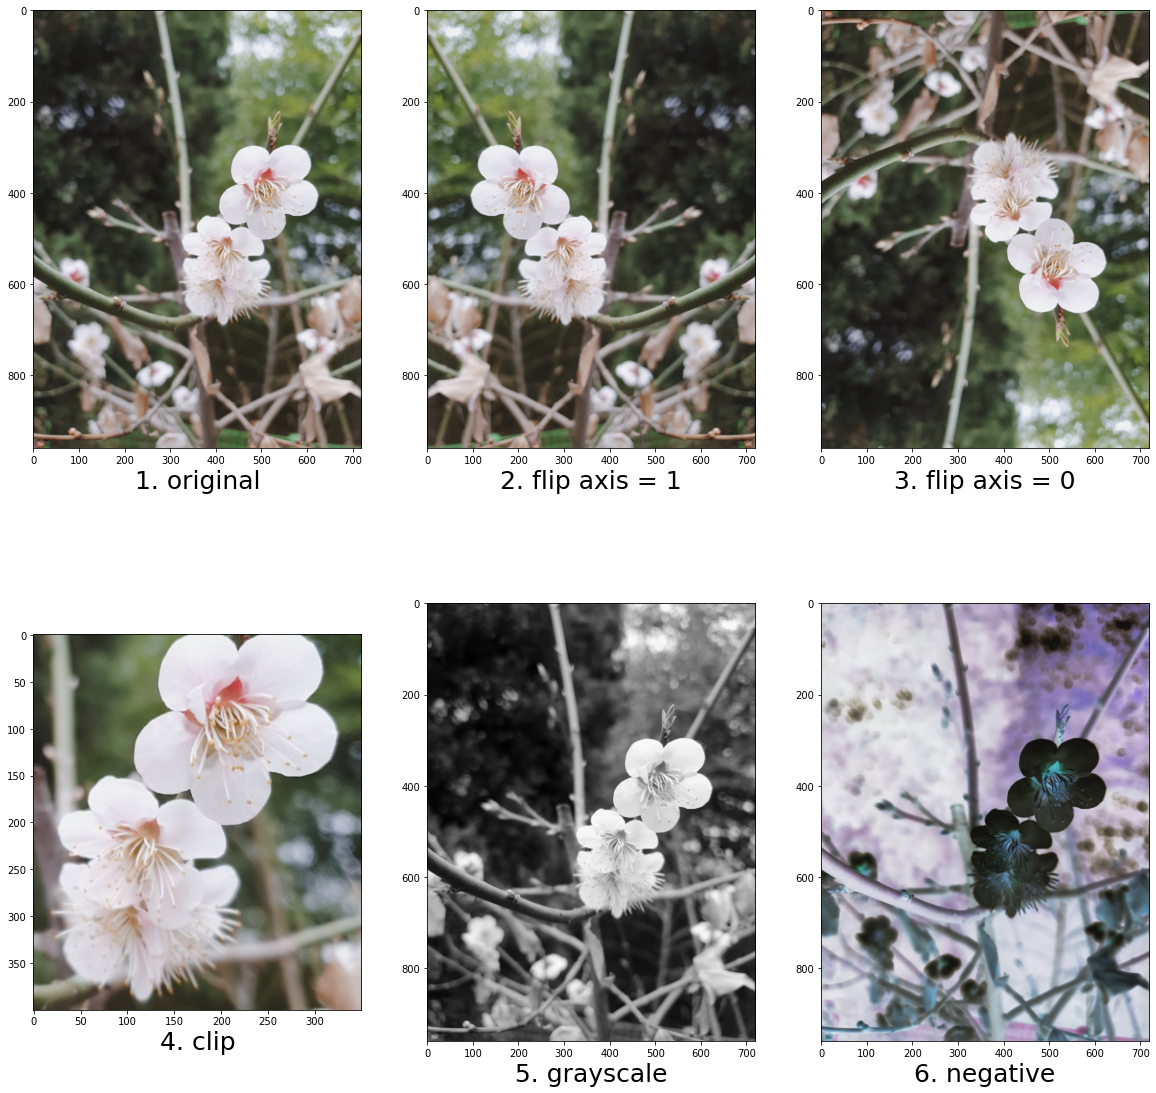

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지 표시 : 보여주기
arr1 = plt.imread('/kaggle/input/220513-img-sample/3.27 flower.jpg')
# print(arr1, end="\n\n")
print(arr1.shape, end="\n\n")
# [픽셀 값 배열 생략] (960, 720, 3) 가로 960, 세로 720, RGB 칼라 이미지

# 이미지 클리핑 : 특정 영역만 잘라서 보여주기
arr2 = arr1[300:700, 300:650, :]  # 가로줄 범위, 세로줄 범위, 색상 차원 지정(R, G, B 중 1개만 혹은 셋 다. 일부만 넣으면 오류 남)

# 이미지 반전 : 축에 대해 뒤집기
arr3_1 = np.flip(arr1, axis=1)  # 0 : 상하반전, 1 : 좌우반전
arr3_0 = np.flip(arr1, axis=0)  # 0 : 상하반전, 1 : 좌우반전

# 이미지 grayscale : 이미지 흑백화하기
def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

arr4 = rgb2gray(arr1)

# 색 반전
arr5 = 1 - arr1

# ------------------------

# 한 figure에 모아서 보기

plt.figure(figsize=(20, 20))

plt.subplot(2, 3, 1) # row의 개수, column의 개수, 몇 번째
plt.imshow(arr1)
plt.xlabel("1. original", fontdict={"fontsize":25})

plt.subplot(2, 3, 2)
plt.imshow(arr3_1)
plt.xlabel("2. flip axis = 1", fontdict={"fontsize":25})

plt.subplot(2, 3, 3)
plt.imshow(arr3_0)
plt.xlabel("3. flip axis = 0", fontdict={"fontsize":25})

plt.subplot(2, 3, 4)
plt.imshow(arr2)
plt.xlabel("4. clip", fontdict={"fontsize":25})

plt.subplot(2, 3, 5)
plt.imshow(arr4, cmap = "gray")
plt.xlabel("5. grayscale", fontdict={"fontsize":25})

plt.subplot(2, 3, 6)
plt.imshow(arr5)
plt.xlabel("6. negative", fontdict={"fontsize":25})

plt.show()

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/220513-img-sample/sungshin.png
/kaggle/input/220513-img-sample/3.27 flower.jpg
/kaggle/input/inflammation/inflammation-01.csv
